Enter your email: rabiddawgz2005@gmail.com
Enter your age: 19
Enter art category (traditional/modern/contemporary): modern
Enter transformation (grayscale/blur/edges): blur
Transformed image saved as output_modern.jpg


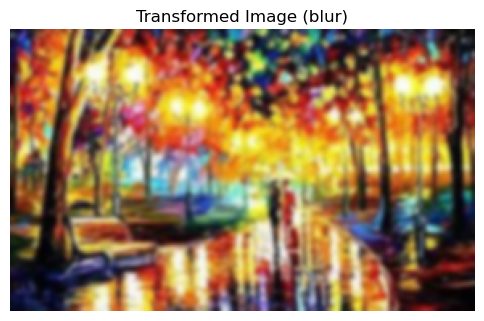

In [2]:
import cv2
import numpy as np
import re
import os
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

def is_valid_email(email):
    """Validate email format."""
    return re.match(r"^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$", email)

def apply_transformation(image_path, transformation):
    """Apply the selected transformation to the image."""
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Image not found or cannot be loaded.")
        return None

    if transformation == "grayscale":
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    elif transformation == "blur":
        return cv2.GaussianBlur(image, (7, 7), 0)
    elif transformation == "edges":
        return cv2.Canny(image, 50, 150)
    else:
        print("Invalid transformation. No changes applied.")
        return image

def show_image(image, transformation):
    """Display the transformed image using matplotlib."""
    plt.figure(figsize=(6, 6))  # Set figure size

    if transformation in ["grayscale", "edges"]:
        plt.imshow(image, cmap="gray")  # Grayscale and edges should be in grayscale
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display

    plt.axis("off")  # Hide axes
    plt.title(f"Transformed Image ({transformation})")
    plt.show()

def main():
    """Main function to take user input and process the image."""
    email = input("Enter your email: ")
    age = input("Enter your age: ")
    category = input("Enter art category (traditional/modern/contemporary): ").lower()
    transformation = input("Enter transformation (grayscale/blur/edges): ").lower()
    
    image_collections = {
        "traditional": "traditional.jpg",
        "modern": "modern.jpg",
        "contemporary": "contemporary.jpg"
    }
    
    # Validate inputs
    if not is_valid_email(email):
        print("Invalid email format.")
        return
    if not age.isdigit() or int(age) <= 18:
        print("Age must be above 18.")
        return
    if category not in image_collections:
        print("Invalid category.")
        return
    
    image_path = image_collections[category]
    
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return

    transformed_image = apply_transformation(image_path, transformation)

    if transformed_image is None:
        return

    output_path = f"output_{category}.jpg"
    cv2.imwrite(output_path, transformed_image)
    
    print(f"Transformed image saved as {output_path}")

    # Display the image using matplotlib
    show_image(transformed_image, transformation)

if __name__ == "__main__":
    main()
